In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [2]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession \
    .builder \
    .getOrCreate()

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:green">'+string+'</span>'))

In [4]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show(5)

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [16]:
results=spark.sql("select voltage from washing where voltage is not null")
results_array=results.rdd.map(lambda row:row.voltage).sample(False, 0.1).collect()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b8af9c2c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8af9c2dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b8af980b48>],
 'medians': [<matplotlib.lines.Line2D at 0x1b8af9cffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b8af9d3b48>],
 'means': []}

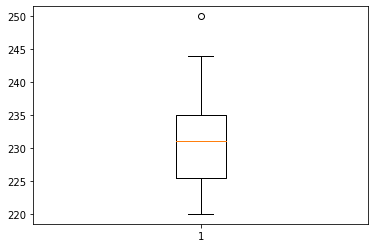

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(results_array)

In [25]:
results=spark.sql("select voltage, ts from washing where voltage is not null order by ts asc")
results_sample=results.rdd.sample(False, 0.1)
results_volt=results_sample.map(lambda row:row.voltage).collect()
results_ts=results_sample.map(lambda row:row.ts).collect()

plt.plot(results_ts, results_volt)
plt.xlabel('time')
plt.ylabel('volt')
plt.show()

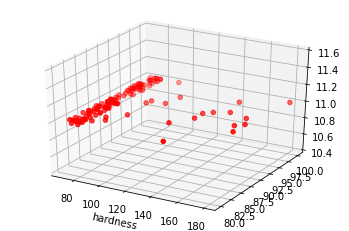

In [26]:
results=spark.sql("select hardness, temperature, flowrate from washing where hardness is not null and flowrate is not null and temperature is not null")
results_sample=results.rdd.sample(False, 0.1)
results_hardness=results_sample.map(lambda x:x.hardness).collect()
results_temperature=results_sample.map(lambda x:x.temperature).collect()
results_flowrate=results_sample.map(lambda x:x.flowrate).collect()

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(results_hardness, results_temperature, results_flowrate, c='r', marker='o')
ax.set_xlabel('hardness')
plt.show()

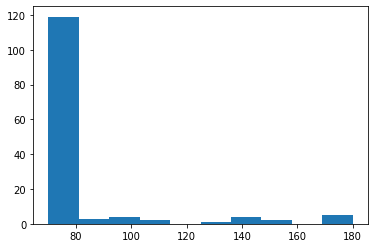

In [27]:

plt.hist(results_hardness)
plt.show()